# Assignment 1: k-means Clustering
## Author: Jerome Geronimo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [2]:
# Load the dataset into a pandas dataframe
country_data = pd.read_csv("./UML_assignment1/Country-data.csv")

# Prints the first few rows of the dataset
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Dataset Observations

There are 167 countries in the dataset, each with their own data for the following columns:

- Child Mortality - No. of deaths of children under 5 years of age per 1000 live births
- Exports - Exports of goods and services per capita. Given as percentage of the GDP per capita
- Health - Total health spending per capita. Given as percentage of GDP per capita
- Imports - Imports of goods and services per capita. Given as percentage of the GDP per capita
- Income - Net income per person
- Inflation - The measurement of the annual growth rate of the Total GDP
- Life Expectancy - The average number of years a new born child would live if the current mortality patterns are to remain the same
- Total Fertility - The number of children that would be born to each woman if the current age-fertility rates remain the same
- GDPP - The GDP per capita. Calculated as the Total GDP divided by the total population

**Child mortality** data has quite a large range of values with a minimum of 2.6, a maximum of 208, and a median of 19.3, suggesting that the data is skewed to the right.

Another observation is that some of the columns (income, gdpp) have **extremely large values** and could present challenges with training the model. These values need to be scaled down to prevent biases.

#### Check data types

Data types for all the columns make sense. I would have preferred if the **income** and **gdpp** columns were of **float** data type, but the source dataset already had them as ints.

In [4]:
# Prints information about the dataframe
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### Check for null values and duplicates

There are no missing values in the dataset, and there are no duplicates either.

In [5]:
country_data[country_data.isnull().any(axis=1)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [6]:
country_data[country_data.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


#### Extract features from the dataframe

In [7]:
features = country_data.drop("country", axis=1)
features

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#### Correlation Matrix

The heatmap displayed below shows the correlation between the different variables in the dataset.

A value close to or equal to 1 indicates a positive linear relationship, while a value close to or equal to -1 indicates a negative linear relationship between the two variables. A value close to or equal to 0 indicates that there is no clear linear relationship between the two variables.

The correlation map shows the following relationships:
- Strong
  - There is a strong negative linear relationship between Life Expectancy and Child Mortality
  - There is a strong positive linear relationship between Total Fertility and Child Mortality
  - There is a strong positive linear relationship between Imports and Exports
  - There is a strong negative linear relationship between Life Expectancy and Total Fertility
  - There is a strong positive linear relationship between Income and GDPP
- Moderate
  - There is a moderate negative linear relationship between Child Mortality and Income, GDPP
  - There is a modereate positive linear relationship between Exports and Income, GDPP
  - There is a modereate positive linear relationship between Income and Life Expectancy
 
Health and Inflation doesn't seem to have any strong relationship with any of the other features.

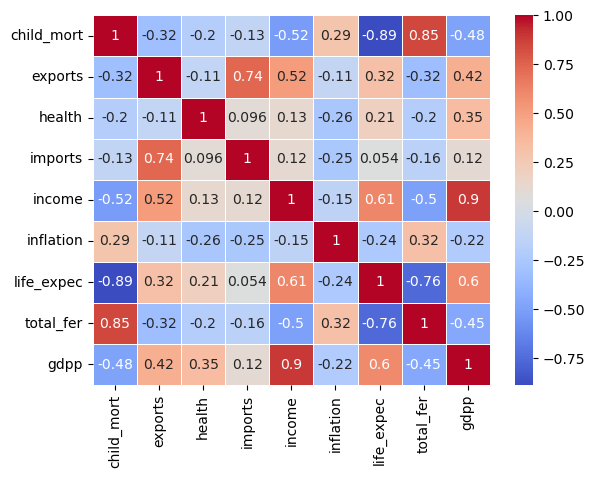

In [8]:
# Create a correlation matrix
corr_matrix = country_data.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show plot
plt.show()

#### Pair Plots

Most features are skewed to the right indicating few data points for features with high values.

For example, there are very few countries with high GDP per capita, and it makes sense that the distribution for net income per person follows the same pattern. Countries with high GDP generally have high average income per person. The distribution is skewed to the right though, indicating that there are very few countries with high GDP and net income.

It's also interesting how there are more countries with lower number of children born to each woman (total_fer), and that the number is high for poorer countries (lower GDP). This shows that poorer countries tend to have more children per family which may be caused by multiple factors such as availability of contraception, sex education, etc.

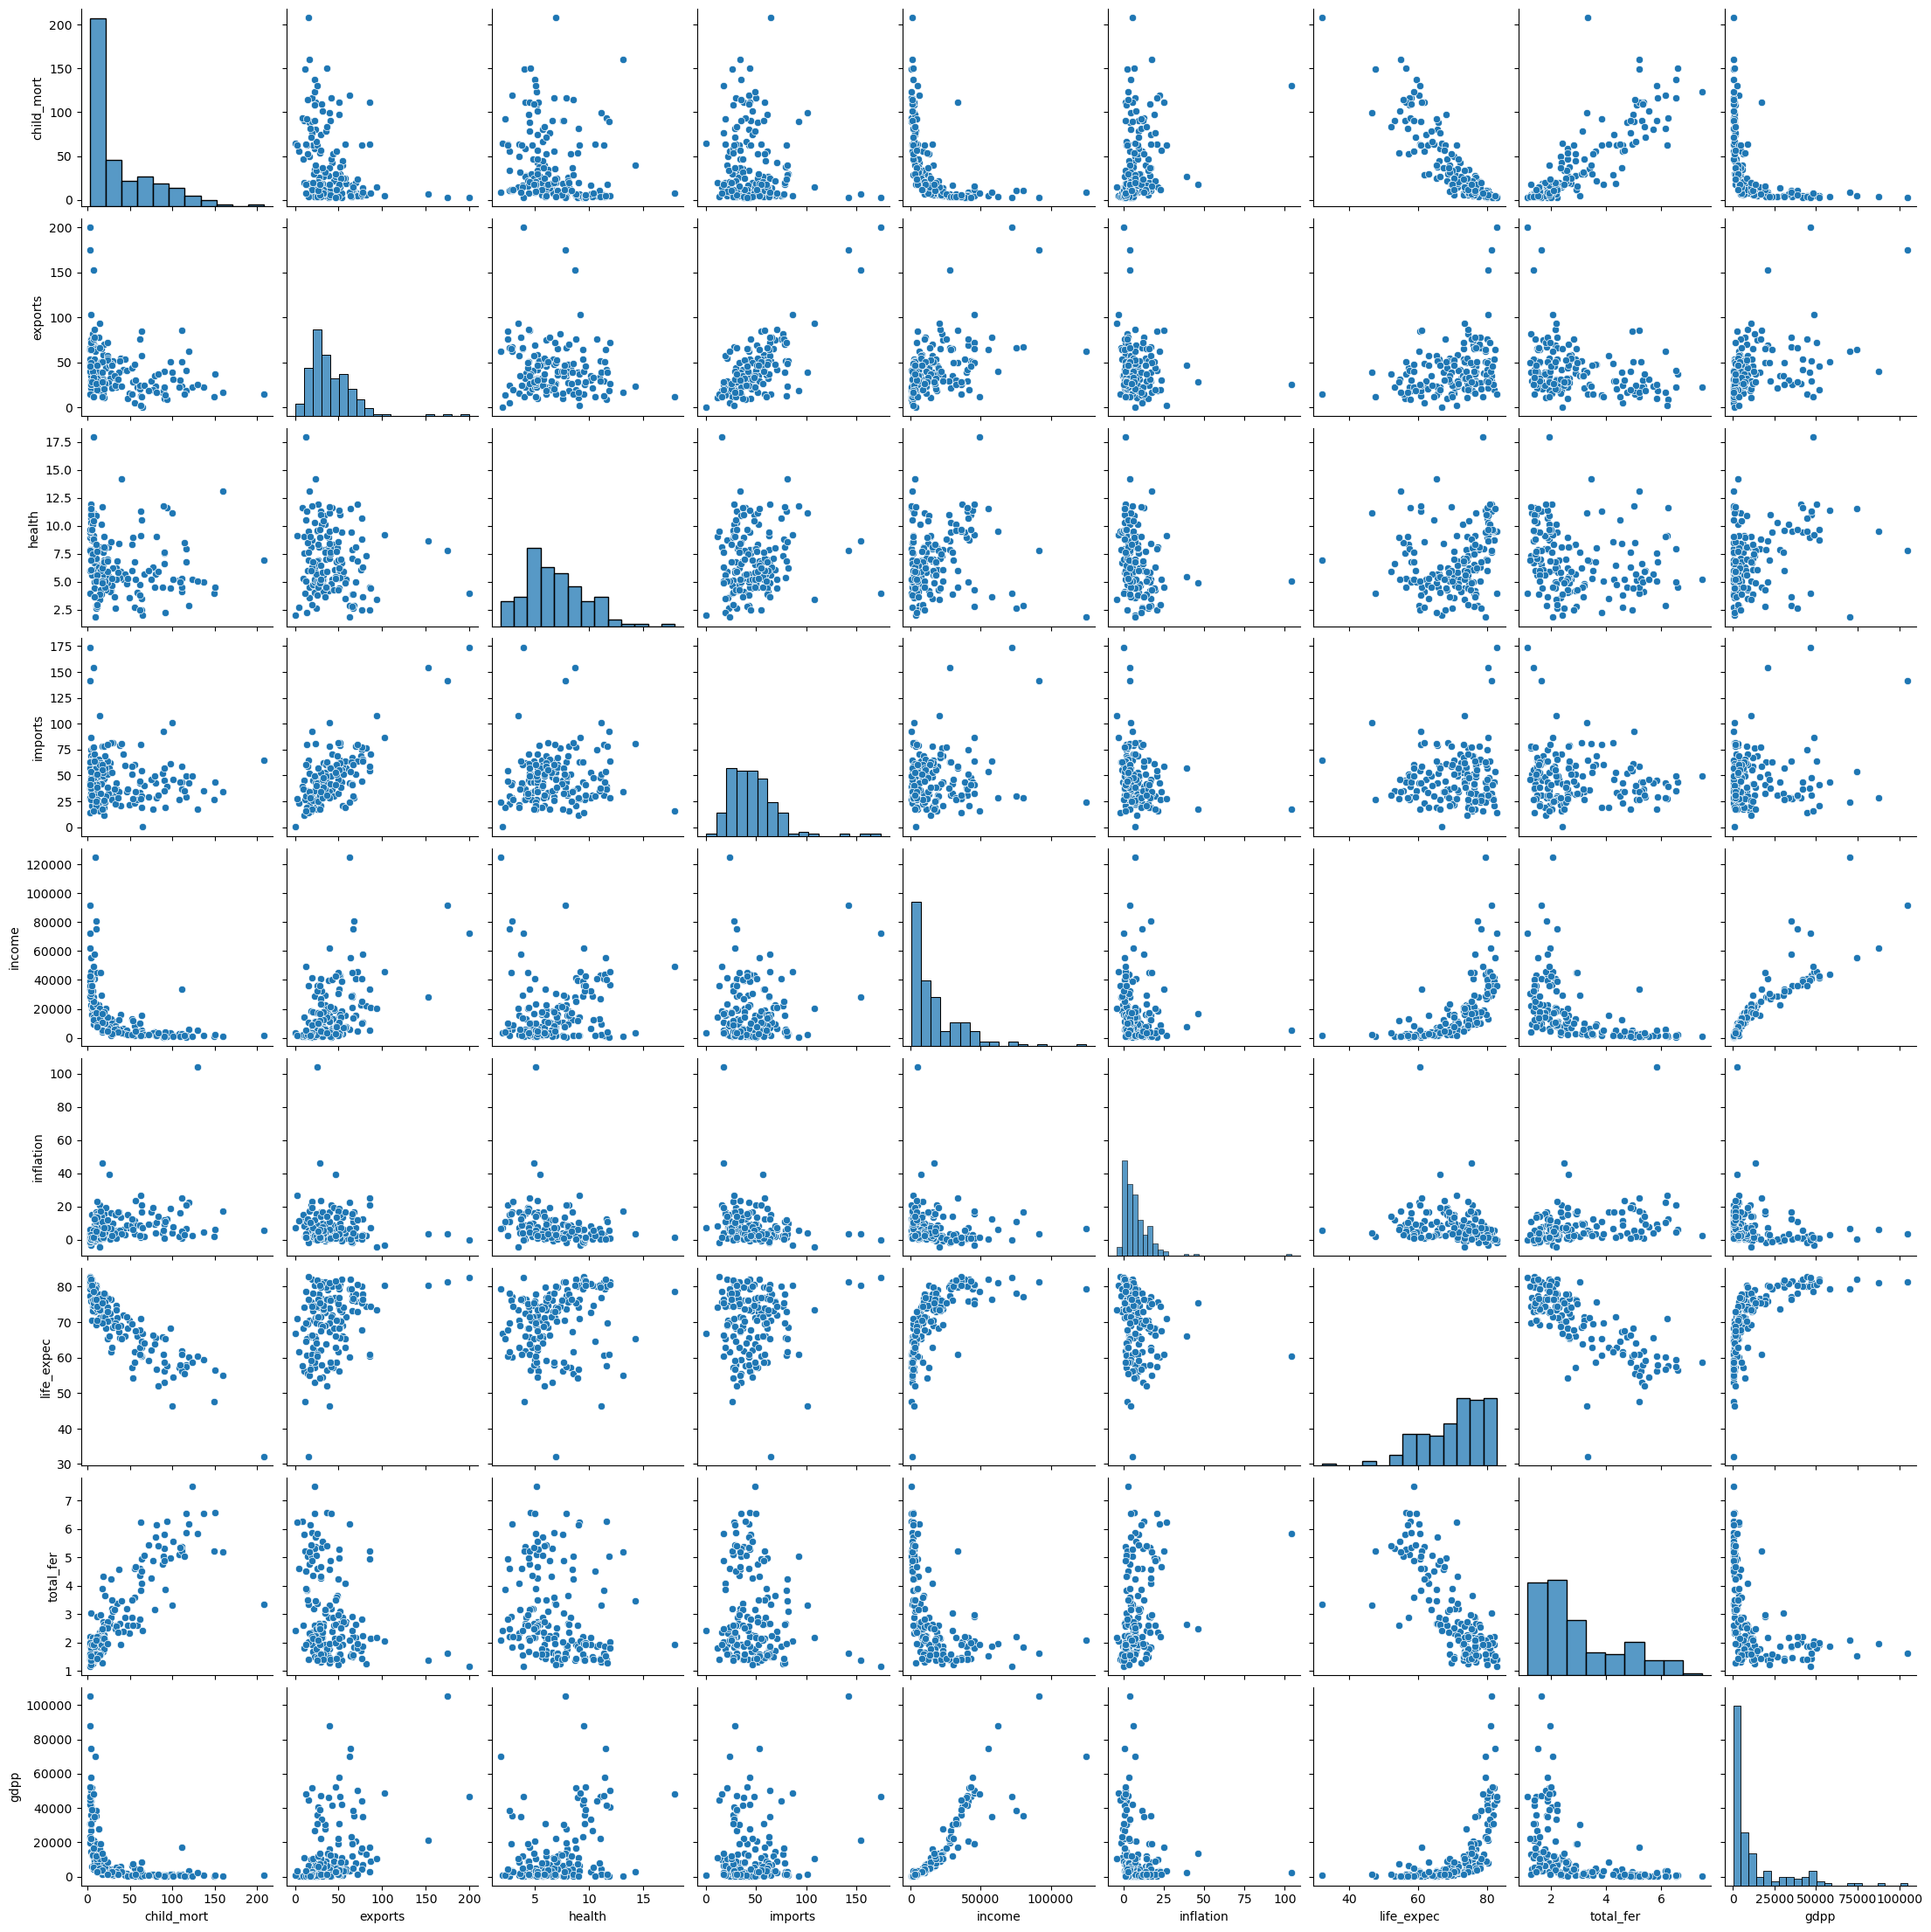

In [9]:
sns.pairplot(features)
plt.show()

### Modeling

#### Scaling the data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the DataFrame
scaled_data = scaler.fit_transform(features)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=features.columns)

In [12]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


#### Using KMeans and Finding the Silhouette Scores

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
df_data = df_scaled.values

In [15]:
# Init list to store silhouette scores
silhouette_scores = []

# Step 3: Loop through k values from 2 to 10
for K in range(2, 11):
    # Initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=K, random_state=42)
    
    # Fit the model and predict clusters
    cluster_labels = kmeans.fit_predict(df_data)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_data, cluster_labels)
    
    # Store the silhouette score
    silhouette_scores.append((K, silhouette_avg))

In [16]:
for K, score in silhouette_scores:
    print(f'K = {K}, silhouette score = {score:.4f}')

K = 2, silhouette score = 0.2874
K = 3, silhouette score = 0.2833
K = 4, silhouette score = 0.3014
K = 5, silhouette score = 0.2993
K = 6, silhouette score = 0.2351
K = 7, silhouette score = 0.2491
K = 8, silhouette score = 0.2414
K = 9, silhouette score = 0.2034
K = 10, silhouette score = 0.2193


#### Selecting the optimal value for K

Based on the plot of the number of clusters vs Silhouette score, it seems that K=4 is the optimal number of clusters for this dataset, since it has the highest average silhouette score of 0.30. Increasing the number of clusters further results to a decrease in silhouette scores.

In [17]:
n_clusters_list, scores = zip(*silhouette_scores)

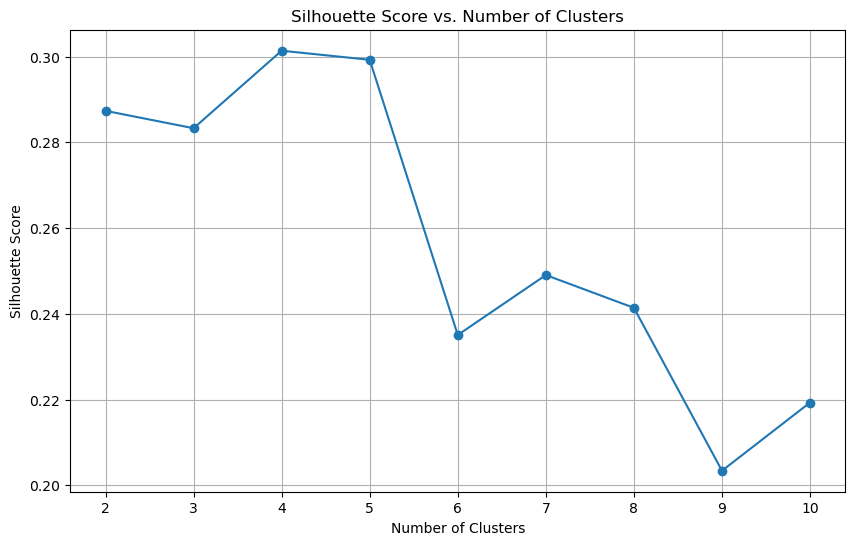

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_list, scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(n_clusters_list)
plt.grid(True)
plt.show()

Using the Elbow method below, the result also suggests using K=4. However, with this method, the elbow point is not as clear. We could just as easily use K=3 or K=5.

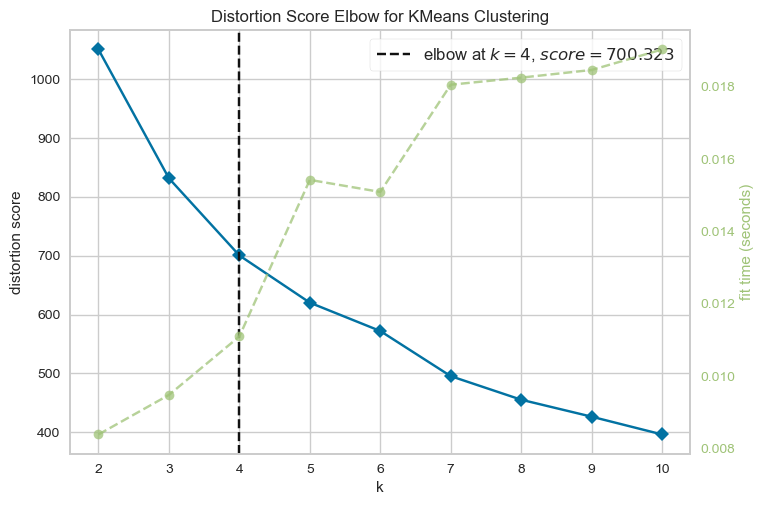

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
kmeans_elbow = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans_elbow, k=(2,11))
 
visualizer.fit(df_data)        # Fit the data to the visualizer
visualizer.show()              # Finalize and render the figure

Using the SilhouetteVisualizer below, however, clearly suggests that K=2 is the optimal number of clusters, for the following reasons:
- There are no negative silhouette scores, suggesting that all data points are correctly clustered
- All clusters have a silhouette score greater than the average score for the dataset, suggesting that all clusters are cohesive
- There aren't any wide fluctuations in the size/width of the clusters

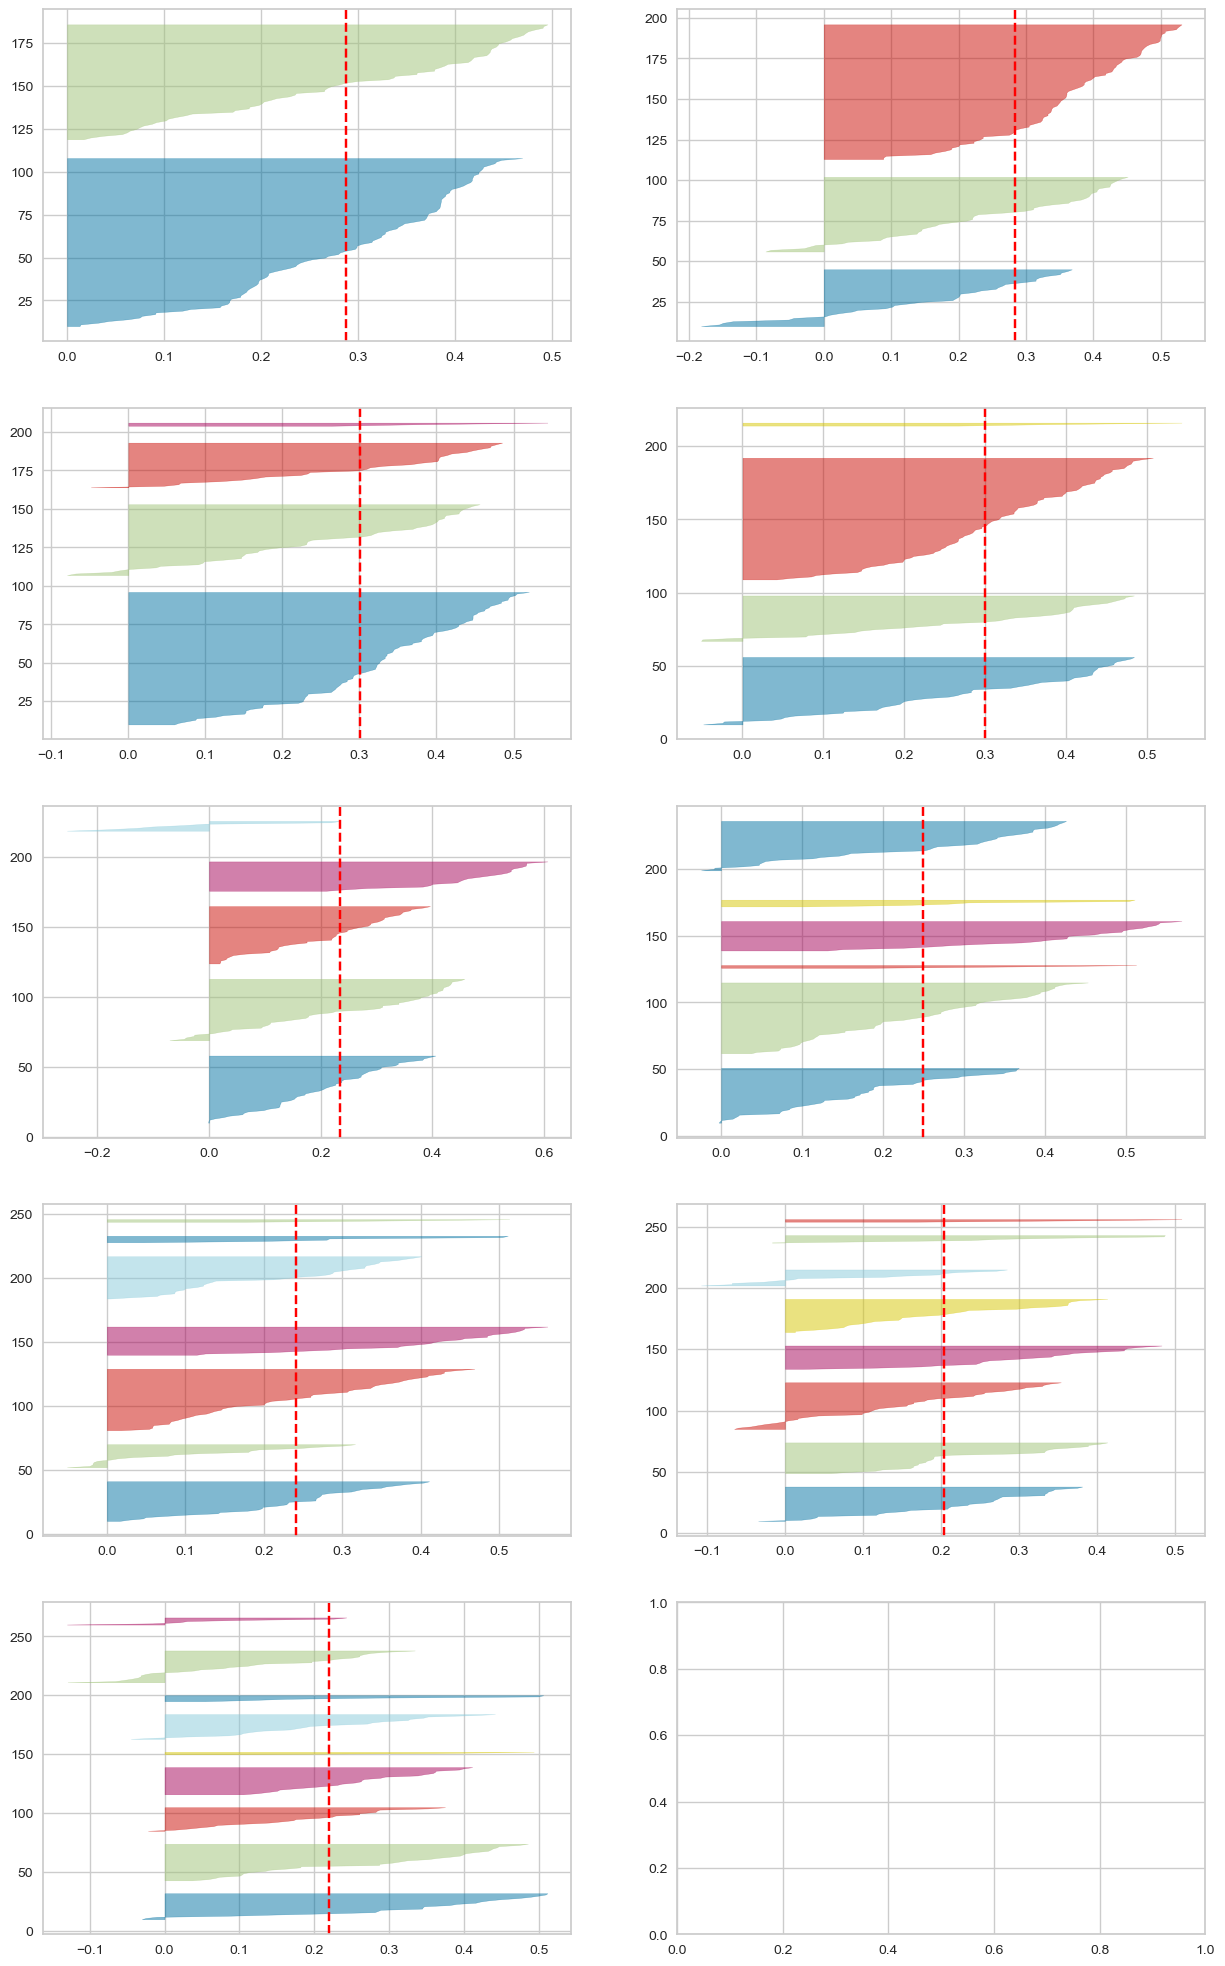

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer
  
fig, ax = plt.subplots(5, 2, figsize=(15,25))
for i in range(2, 11):
    # Create KMeans instances for different number of clusters
    km = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_data) 
plt.show()

#### Training the best model
Based on the observations, using 2 clusters appears to be the most effective approach moving forward.

In [21]:
n_clusters = 2
best_model = KMeans(n_clusters=n_clusters, random_state=42)

cluster_labels = best_model.fit_predict(df_data)

### Conclusion

In [22]:
# Organize data
df_labeled = country_data.copy()
df_labeled['cluster'] = cluster_labels
df_labeled

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


#### Compare Total Health Spending vs Total Fertility

The plot below illustrates the relationship between Total Health Spending and Total Fertility across 167 countries in the dataset. Most countries fall within the range of low to medium Total Health Spending and low to medium Total Fertility.

The clustering model has grouped the countries into two distinct clusters: one representing countries with High Total Fertility (red) and the other with Low Total Fertility (blue). Both clusters show varying levels of Total Health Spending.

High Total Fertility is often associated with limited access to education and healthcare, particularly in lower-income countries where economic factors, such as the need for more children for labor or care in old age, play a significant role. As a result, it is logical that countries with lower health spending tend to have higher fertility rates.

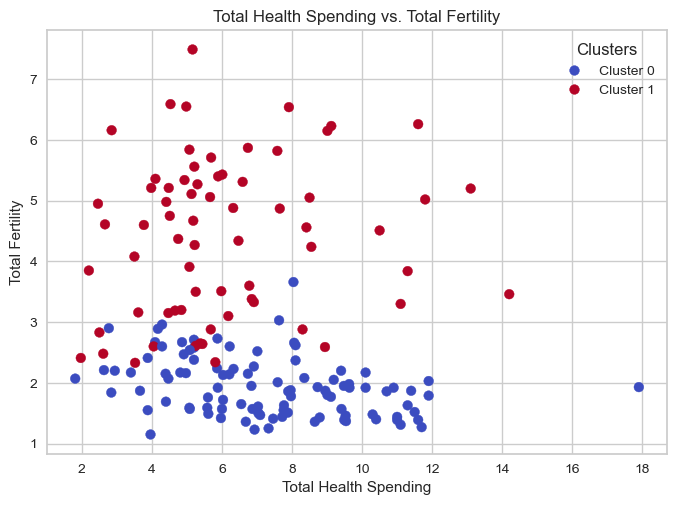

In [23]:
# Scatter plot with clusters and color map
scatter = plt.scatter(df_labeled["health"], df_labeled["total_fer"], c=df_labeled['cluster'], cmap='coolwarm')

# Add title and labels
plt.title('Total Health Spending vs. Total Fertility')
plt.xlabel('Total Health Spending')
plt.ylabel('Total Fertility')

# Create a color bar and legend for clusters
handles, labels = scatter.legend_elements(prop="colors")
legend_labels = [f"Cluster {int(label)}" for label in np.unique(df_labeled['cluster'])]
plt.legend(handles, legend_labels, title="Clusters")

# Show the plot
plt.show()

#### Histogram: Clusters vs No. of Countries

There are fewer countries with low total fertility, with only 68 countries falling into this category, compared to 99 countries with high total fertility.

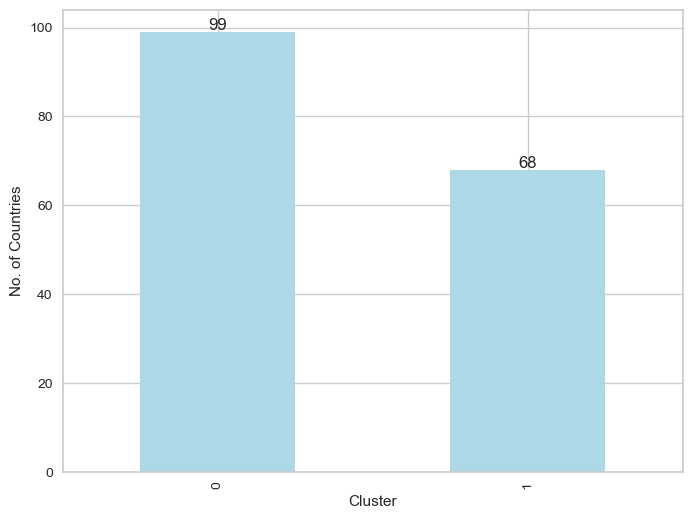

In [24]:
# Group by cluster and count the number of occurrences
cluster_count = df_labeled.groupby('cluster').size()

# Plot the bar chart
# cluster_count.plot(kind='bar', color='lightblue')
ax = cluster_count.plot(kind='bar', color='lightblue', figsize=(8, 6))

# Add number of points on top of each bar
for index, value in enumerate(cluster_count):
    ax.text(index, value + 0.5, str(value), ha='center')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('No. of Countries')

# Show the plot
plt.show()

#### Countries per Cluster

In [25]:
for cluster, group in df_labeled.groupby('cluster'):
    print(f"Cluster: {cluster}")
    print(group['country'].values)  # Print the values of 'Quantity' for each category
    print()

Cluster: 0
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Bhutan' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Canada' 'Cape Verde' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Estonia' 'Fiji' 'Finland'
 'France' 'Georgia' 'Germany' 'Greece' 'Grenada' 'Hungary' 'Iceland'
 'Iran' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kuwait' 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Luxembourg'
 'Macedonia, FYR' 'Malaysia' 'Maldives' 'Malta' 'Mauritius' 'Moldova'
 'Montenegro' 'Morocco' 'Netherlands' 'New Zealand' 'Norway' 'Oman'
 'Panama' 'Paraguay' 'Peru' 'Poland' 'Portugal' 'Qatar' 'Romania' 'Russia'
 'Saudi Arabia' 'Serbia' 'Seychelles' 'Singapore' 'Slovak Republic'
 'Slovenia' 'South Korea' 'Spain' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Suriname' 'Sw

Cluster 0 consists of 99 countries with lower fertility rates, typically linked to higher economic development and better access to healthcare and education. This includes high-income nations like **Australia, Canada, Germany, Japan**, and the **United States**.

Cluster 1 includes 68 countries with higher fertility rates, reflecting lower development and limited healthcare. Many are low-income nations such as **Afghanistan, Nigeria**, and the **Philippines**, where large families are common due to economic needs.

#### Funds Allocation

The countries are divided into two clusters based on their need for aid:

1. **Cluster 1**: Countries with high fertility rates and lower economic development, which need the most aid.
2. **Cluster 0**: Countries with lower fertility rates and higher economic development, which need less aid.

The total funding will be split with 70% allocated to Cluster 1 and 30% to Cluster 0. This allocation prioritizes countries with greater socio-economic challenges. For the sake of simplicity, funds will be distributed equally within each cluster.

- **Cluster 1** (68 countries):  
  - Total Aid: \$70 million  
  - Amount per Country: approx. \$1.03 million
- **Cluster 0** (99 countries):  
  - Total Aid: \$30 million  
  - Amount per Country: ≈ approx. \$0.30 million